I've pivoted my Capstone project to focus on the investigate findings of complaints against PPD officers, as it relates to the officers race. What is the likelihood of a complaint against a PPD officer to be sustained, according to the race of the officer?

In [100]:
#import packages & data
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('ppd_complainant_demographics.csv')
df_2 = pd.read_csv('ppd_complaints.csv')
df_3 = pd.read_csv('ppd_complaint_disciplines.csv')

In [101]:
#quickly exploring each dataframe
df.head()

,complaint_id,complainant_sex,complainant_race,complainant_age,objectid
0,17-0210,Male,Latino,33.0,3645
1,17-0211,Male,Black,71.0,3646
2,17-0212,Male,Black,NaN,3647
3,17-0213,Female,Black,48.0,3648
4,17-0214,Female,Black,52.0,3649


In [102]:
df.shape

(4106, 5)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4106 entries, 0 to 4105
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   complaint_id      4106 non-null   object 
 1   complainant_sex   3931 non-null   object 
 2   complainant_race  3397 non-null   object 
 3   complainant_age   3313 non-null   float64
 4   objectid          4106 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 160.5+ KB


In [104]:
df_2.head()

,complaint_id,date_received,district_occurrence,general_cap_classification,summary,incident_date_extract,incident_time_extract,objectid
0,19-0183,2019-04-29 04:00:00+00,1600.0,PHYSICAL ABUSE,"According to the complainant, on 04-25-19 at 1...",2019-04-25,10:00 PM,807
1,19-0184,2019-04-29 04:00:00+00,1600.0,CRIMINAL ALLEGATION,"According to the complainant, on 4-16-19 or 4-...",2019-04-16,05:00 PM,808
2,19-0185,2019-04-29 04:00:00+00,1400.0,DEPARTMENTAL VIOLATIONS,"According to the complainant, on 03-30-19 at 7...",2019-03-30,07:15 PM,809
3,19-0186,2019-04-29 04:00:00+00,1400.0,PHYSICAL ABUSE,"According to the complainant, on 4-10-19 at 8:...",2019-04-10,08:00 PM,810
4,19-0187,2019-05-02 04:00:00+00,600.0,LACK OF SERVICE,"According to the complainant, on 3-25-19, they...",2019-03-25,NaN,811


In [105]:
df_2.shape

(3908, 8)

In [106]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3908 entries, 0 to 3907
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   complaint_id                3908 non-null   object 
 1   date_received               3908 non-null   object 
 2   district_occurrence         3790 non-null   float64
 3   general_cap_classification  3906 non-null   object 
 4   summary                     3908 non-null   object 
 5   incident_date_extract       3613 non-null   object 
 6   incident_time_extract       3099 non-null   object 
 7   objectid                    3908 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 244.4+ KB


In [107]:
df_3.head()

,complaint_id,officer_id,po_race,po_sex,po_assigned_unit,allegations_investigated,investigative_findings,disciplinary_findings,objectid
0,18-0425,47882806.0,Latino,Male,2400 24TH DISTRICT,Departmental Violation,Sustained Finding,Guilty Finding,1170
1,18-0425,47882806.0,Latino,Male,2400 24TH DISTRICT,Lack of Service,Sustained Finding,Guilty Finding,1171
2,18-0425,47882806.0,Latino,Male,2400 24TH DISTRICT,Departmental Violation,Sustained Finding,Guilty Finding,1172
3,18-0426,46328584.0,White,Male,2500 25TH DISTRICT,Physical Abuse,No Sustained Findings,Not Applicable,1173
4,18-0426,46328584.0,White,Male,2500 25TH DISTRICT,Verbal Abuse,No Sustained Findings,Not Applicable,1174


In [108]:
df_3.shape

(11253, 9)

In [109]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11253 entries, 0 to 11252
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   complaint_id              11253 non-null  object 
 1   officer_id                10710 non-null  float64
 2   po_race                   10710 non-null  object 
 3   po_sex                    10710 non-null  object 
 4   po_assigned_unit          10706 non-null  object 
 5   allegations_investigated  11251 non-null  object 
 6   investigative_findings    11251 non-null  object 
 7   disciplinary_findings     11251 non-null  object 
 8   objectid                  11253 non-null  int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 791.4+ KB


In [110]:
#merge on common feature: complaint_id
mdf = pd.merge(df, df_2, on = 'complaint_id')
merged_df = pd.merge(mdf, df_3, on = 'complaint_id')

In [111]:
merged_df.head()

,complaint_id,complainant_sex,complainant_race,complainant_age,objectid_x,date_received,district_occurrence,general_cap_classification,summary,incident_date_extract,incident_time_extract,objectid_y,officer_id,po_race,po_sex,po_assigned_unit,allegations_investigated,investigative_findings,disciplinary_findings,objectid
0,17-0210,Male,Latino,33.0,3645,2017-05-04 04:00:00+00,9000.0,PHYSICAL ABUSE,"According to the complainant, on 4-16-17 at 1:...",2017-04-16,01:45 AM,3466,91900216.0,White,Male,0900 09TH DISTRICT,Departmental Violation,No Sustained Findings,Not Applicable,10110
1,17-0210,Male,Latino,33.0,3645,2017-05-04 04:00:00+00,9000.0,PHYSICAL ABUSE,"According to the complainant, on 4-16-17 at 1:...",2017-04-16,01:45 AM,3466,91900216.0,White,Male,0900 09TH DISTRICT,Physical Abuse,No Sustained Findings,Not Applicable,10111
2,17-0210,Male,Latino,33.0,3645,2017-05-04 04:00:00+00,9000.0,PHYSICAL ABUSE,"According to the complainant, on 4-16-17 at 1:...",2017-04-16,01:45 AM,3466,52234079.0,White,Male,0900 09TH DISTRICT,Physical Abuse,No Sustained Findings,Not Applicable,10112
3,17-0210,Male,Latino,33.0,3645,2017-05-04 04:00:00+00,9000.0,PHYSICAL ABUSE,"According to the complainant, on 4-16-17 at 1:...",2017-04-16,01:45 AM,3466,52234079.0,White,Male,0900 09TH DISTRICT,Departmental Violation,No Sustained Findings,Not Applicable,10113
4,17-0211,Male,Black,71.0,3646,2017-05-04 04:00:00+00,2400.0,LACK OF SERVICE,"According to the complainant, on 4-25-17 at 1:...",2017-04-25,01:30 AM,3467,92448331.0,Black,Male,2500 25TH DISTRICT,Lack of Service,No Sustained Findings,Not Applicable,10114


In [112]:
#drop columns not relavant to our project
columns_to_drop = ['complainant_age', 'objectid_x', 'district_occurrence', 'summary', 'incident_date_extract', 'incident_time_extract', 'objectid_y', 'complainant_sex', 'complainant_race', 'officer_id', 'po_assigned_unit', 'allegations_investigated', 'objectid', 'disciplinary_findings']
merged_df = merged_df.drop(columns = columns_to_drop)

In [113]:
merged_df.head()

,complaint_id,date_received,general_cap_classification,po_race,po_sex,investigative_findings
0,17-0210,2017-05-04 04:00:00+00,PHYSICAL ABUSE,White,Male,No Sustained Findings
1,17-0210,2017-05-04 04:00:00+00,PHYSICAL ABUSE,White,Male,No Sustained Findings
2,17-0210,2017-05-04 04:00:00+00,PHYSICAL ABUSE,White,Male,No Sustained Findings
3,17-0210,2017-05-04 04:00:00+00,PHYSICAL ABUSE,White,Male,No Sustained Findings
4,17-0211,2017-05-04 04:00:00+00,LACK OF SERVICE,Black,Male,No Sustained Findings


In [114]:
#check for duplicates
merged_df['complaint_id'].value_counts()

20-0250    50
20-0246    42
21-0306    42
20-0327    39
20-0445    36
           ..
20-0552     1
20-0549     1
20-0545     1
20-0544     1
23-0057     1
Name: complaint_id, Length: 3875, dtype: int64

In [115]:
#drop them
no_dups = merged_df.drop_duplicates()

In [116]:
no_dups.head()

,complaint_id,date_received,general_cap_classification,po_race,po_sex,investigative_findings
0,17-0210,2017-05-04 04:00:00+00,PHYSICAL ABUSE,White,Male,No Sustained Findings
4,17-0211,2017-05-04 04:00:00+00,LACK OF SERVICE,Black,Male,No Sustained Findings
5,17-0212,2017-04-27 04:00:00+00,CRIMINAL ALLEGATION,NaN,NaN,No Sustained Findings
6,17-0213,2017-05-04 04:00:00+00,VERBAL ABUSE,Black,Female,No Sustained Findings
8,17-0214,2017-05-04 04:00:00+00,DEPARTMENTAL VIOLATIONS,Black,Female,No Sustained Findings


In [117]:
no_dups.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6384 entries, 0 to 11971
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   complaint_id                6384 non-null   object
 1   date_received               6384 non-null   object
 2   general_cap_classification  6382 non-null   object
 3   po_race                     5930 non-null   object
 4   po_sex                      5930 non-null   object
 5   investigative_findings      6382 non-null   object
dtypes: object(6)
memory usage: 349.1+ KB


In [118]:
#drop missing values
cleaned = no_dups.dropna()

In [119]:
cleaned.head()

,complaint_id,date_received,general_cap_classification,po_race,po_sex,investigative_findings
0,17-0210,2017-05-04 04:00:00+00,PHYSICAL ABUSE,White,Male,No Sustained Findings
4,17-0211,2017-05-04 04:00:00+00,LACK OF SERVICE,Black,Male,No Sustained Findings
6,17-0213,2017-05-04 04:00:00+00,VERBAL ABUSE,Black,Female,No Sustained Findings
8,17-0214,2017-05-04 04:00:00+00,DEPARTMENTAL VIOLATIONS,Black,Female,No Sustained Findings
12,17-0216,2017-05-04 04:00:00+00,DEPARTMENTAL VIOLATIONS,White,Male,No Sustained Findings


In [120]:
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5926 entries, 0 to 11971
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   complaint_id                5926 non-null   object
 1   date_received               5926 non-null   object
 2   general_cap_classification  5926 non-null   object
 3   po_race                     5926 non-null   object
 4   po_sex                      5926 non-null   object
 5   investigative_findings      5926 non-null   object
dtypes: object(6)
memory usage: 324.1+ KB


Data is cleaned & ready for EDA!

In [125]:
#let's get an idea of the occurence of each complaint type
complaint_types = cleaned['general_cap_classification'].value_counts()
print(complaint_types)

DEPARTMENTAL VIOLATIONS       1776
LACK OF SERVICE               1291
PHYSICAL ABUSE                1039
UNPROFESSIONAL CONDUCT         523
VERBAL ABUSE                   368
HARASSMENT                     240
CIVIL RIGHTS COMPLAINT         237
CRIMINAL ALLEGATION            235
NON-INVESTIGATORY INCIDENT      87
DOMESTIC                        54
FALSIFICATION                   42
SEXUAL CRIME/MISCONDUCT         29
DRUGS                            3
OTHER MISCONDUCT                 1
FORCE-TASER/CED/ECW              1
Name: general_cap_classification, dtype: int64


/var/folders/l0/nstnpmsj4vx3h2j35yqllfcr0000gn/T/ipykernel_73481/1589563292.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


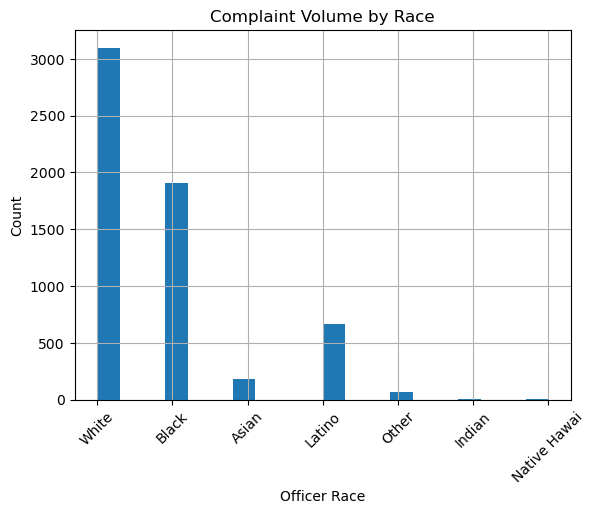

In [122]:
#same for racial makeup of officer's receiving complaints
ax = cleaned['po_race'].hist(bins = 20)
ax.set_ylabel('Count')
ax.set_xlabel('Officer Race')
ax.set_title('Complaint Volume by Race')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

For context, the PPD racial makeup is about 57% white and 30% black, so this is not shockingly disproportionate at first glance.

/var/folders/l0/nstnpmsj4vx3h2j35yqllfcr0000gn/T/ipykernel_73481/2972318959.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


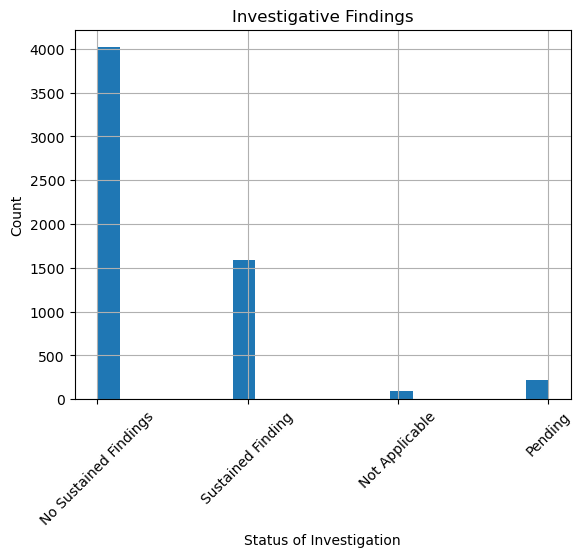

In [123]:
#how often are complaints sustained?
ax = cleaned['investigative_findings'].hist(bins = 20)
ax.set_ylabel('Count')
ax.set_xlabel('Status of Investigation')
ax.set_title('Investigative Findings')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

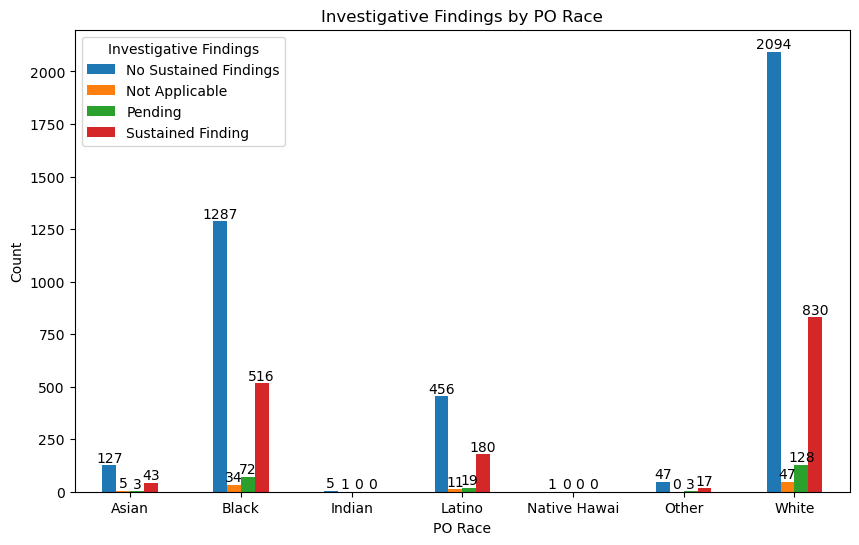

In [134]:
#now let's visualize investigative_findings by po_race
grouped_counts = cleaned.groupby(['po_race', 'investigative_findings']).size().unstack(fill_value=0)
axx = grouped_counts.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.xlabel('PO Race')
plt.ylabel('Count')
plt.title('Investigative Findings by PO Race')
plt.xticks(rotation=0)
axx.legend(title='Investigative Findings')
for container in axx.containers:
    axx.bar_label(container, fmt='%d', label_type='edge')
plt.show()

In [141]:
#rate at which complaints against Black PPD officers are sustained
b_rate = 516 / (1287 + 516)
print('Complaints against Black PPD officers are sustained ', b_rate, '% of the time.')

#rate at which complaints against White PPD officers are sustained
w_rate = 830 / (2094 + 830)
print('Complaints against White PPD officers are sustained ', w_rate, '% of the time.')

#rate at which complaints against Latino PPD officers are sustained
l_rate = 180 / (456 + 180)
print('Complaints against Latino PPD officers are sustained ', l_rate, '% of the time.')

Complaints against Black PPD officers are sustained  0.28618968386023297 % of the time.
Complaints against White PPD officers are sustained  0.28385772913816687 % of the time.
Complaints against Latino PPD officers are sustained  0.2830188679245283 % of the time.
